# Analyzing images of SDT horiz lines

Leanne Friedrich 4/27/23

## Initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [44]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
sys.path.append(os.path.dirname(module_path))
from py.tools.config import cfg
import py.tools.logs as logs
import py.vid.v_tools as vt
import py.metrics.m_SDT as me
from py.im.imshow import imshow
import py.file.file_handling as fh
import py.vid.noz_detect as nt
import pandas as pd
from py.full_sequence import SDTWorkflow, fullSequencer
LOGGERDEFINED = logs.openLog('still_measure_horiz.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# export crops

In [12]:
from py.val.v_print import printVals
vt1 = printVals(os.path.join(cfg.path.server, r'SDT\SO_S20-0.5\I_SO7-S20-0.5_S_3.00\I_SO7-S20-0.5_S_3.00_v2_230509\disturbHoriz3_1_0.875'))

C:/Users/lmf1/OneDriveNIST/NIST/data/material properties/rheology/summaries/vidRheSDT.csv
C:/Users/lmf1/OneDriveNIST/NIST/data/material properties/density/summaries/vidDensitiesSDT.csv
C:/Users/lmf1/OneDriveNIST/NIST/data/material properties/surface tension/force tensiometer/summaries/interfacial_tension_SDT.csv


In [14]:
vt1.metarow()

({'printFolder': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\SDT\\SO_S20-0.5\\I_SO7-S20-0.5_S_3.00\\I_SO7-S20-0.5_S_3.00_v2_230509\\disturbHoriz3_1_0.875',
  'bn': 'I_SO7-S20-0.5_S_3.00',
  'date': 230509,
  'sigma': 1.7649,
  'fluFile': True,
  'calibFile': True,
  'spacing': 0.875,
  'vRatio': 1.0,
  'dEst': 0.603,
  'viscRatio': 0.0011613090650250998,
  'tau0aRatio': 0.03353559842478705,
  'tau0dRatio': 0.36216787638480896,
  'GaRatio': 0.804362727383544,
  'GdRatio': 0.8866166149808284,
  'GtaRatio': 10.602057892145151,
  'tGdRatio': 0.0004249498317670524,
  'rGrava': -58819387.75510198,
  'rGravd': -774622.448979591,
  'int_Re': 7.772170234091932e-06,
  'ReRatio': 1.782417488182116,
  'hDragP': 1275.9846150032317,
  'vDragP': 329.1799819206836,
  'int_CaInv': 0.00022977877022545265,
  'pressureCh0': 118353.62978249586,
  'ink_shortname': 'SO7-S20-0.5',
  'ink_days': 1,
  'ink_rheModifier': 'Aerosil R812S',
  'ink_surfactant': 'Span 20',
  'ink_surfactantWt': 0.5

In [ ]:
# export cropped images and table of their crop locations
folder = [os.path.join(cfg.path.server, 'SDT', s) for s in ['SO_S20-0.5', 'SO_S85-0.05']]
cexp = me.cropExporter(folder, me.fileHorizSDT, mustMatch=['Horiz'], overwrite=False)
cexp.run()

In [19]:
# export cropped images and table of their crop locations
folder =os.path.join(cfg.path.server, r'SDT\SO_S20-0.5\I_SO7-S20-0.5_S_3.00\I_SO7-S20-0.5_S_3.00_v2_230509\disturbHoriz3_1_0.875')
cexp = me.cropExporter(folder, me.fileHorizSDT, mustMatch=['Horiz'], overwrite=False, printTraceback=True)
cexp.run()

//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_3.00\I_SO7-S20-0.5_S_3.00_v2_230509\disturbHoriz3_1_0.875


[]

In [18]:
cexp.testFileError(0)

{'file': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\SDT\\SO_S20-0.5\\I_SO7-S20-0.5_S_3.00\\I_SO7-S20-0.5_S_3.00_v2_230509\\disturbHoriz3_1_0.875\\disturbHoriz3_1_0.875_vstill_HOh1_l0d1o1_I_SO7-S20-0.5_S_3.00_230509_114517_0.png', 'error': ''}


# generate Usegment

In [ ]:
# export just the segmented images
folder = [os.path.join(cfg.path.server, 'SDT', s) for s in ['SO_S20-0.5', 'SO_S85-0.05']]
hexp = me.segmentExporter(folder, me.fileHorizSDT, mustMatch=['Horiz'], overwrite=False)
herrorList = hexp.run()

# move crops to ML folder

In [4]:
# copy all cropped files to a separate folder for easy file transfer to wipp
cropfolder = os.path.join(cfg.path.server, 'singleDoubleTripleML', 'newCropsVert')
topfolders = [os.path.join(cfg.path.server, 'SDT', 'SO_S85-0.05', f'I_SO8-S85-0.05_S_{s}') for s in ['3.00', '3.50', '4.00']]
for topfolder in topfolders:
    me.copyToMLInputFolder(cropfolder, topfolder, mustMatch=['Horiz'])

In [ ]:
# find folders which are missing ML results and copy the files to the transfer folder
cropfolder = os.path.join(cfg.path.server, 'singleDoubleTripleML', 'newCrops')
topfolder = os.path.join(cfg.path.server, 'SDT')
missingFolders = me.findMissingML(topfolder, cropfolder, mustMatch=['Horiz'])

In [5]:
# split newcrops into sub folders
folder = os.path.join(cfg.path.server, 'singleDoubleTripleML', 'newCrops')
me.splitIntoSubFolders(folder)

# move ML results back to folders

In [6]:
# move ML segmented images from the output folder to the appropriate subfolders
folders = [os.path.join(cfg.path.server
                       , r'singleDoubleTripleML\results'
                       , f'lf-unet-horiz-SO-{s}-v2-2-segment-outputDir'
                       , 'png') for s in [4]]
rm = me.resultMover(folders, os.path.join(cfg.path.server, 'SDT'), tag='MLsegment2')

INFO: Copying 24047 files in ['//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\singleDoubleTripleML\\results\\lf-unet-horiz-SO-4-v2-2-segment-outputDir\\png']
INFO: Copied 1, already 0, total 24047
INFO: Copied 96, already 5, total 24047
INFO: Copied 195, already 6, total 24047
INFO: Copied 295, already 6, total 24047
INFO: Copied 390, already 11, total 24047
INFO: Copied 487, already 14, total 24047
INFO: Copied 587, already 14, total 24047
INFO: Copied 685, already 16, total 24047
INFO: Copied 783, already 18, total 24047
INFO: Copied 878, already 23, total 24047
INFO: Copied 976, already 25, total 24047
INFO: Copied 1074, already 27, total 24047
INFO: Copied 1173, already 28, total 24047
INFO: Copied 1270, already 31, total 24047
INFO: Copied 1367, already 34, total 24047
INFO: Copied 1465, already 36, total 24047
INFO: Copied 1562, already 39, total 24047
INFO: Copied 1660, already 41, total 24047
INFO: Copied 1758, already 43, total 24047
INFO: Copied 1853, already 4

In [6]:
rm.moveMLResult(rm.error[0])

FileNotFoundError: Could not find disturbHoriz3_2_1.250_vstill_HOh2_l3w1o6_I_SO11_S_3.50_230214_144652_8.png in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT

# make measurements and summaries and summary table

In [13]:
fstr = r'SDT'
folder = os.path.join(cfg.path.server, fstr)
sv = me.summarizerHorizSDT(folder, overwriteMeasure=False, overwriteSummary=False)

In [14]:
sv.run()
sv.export()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbHoriz3_1_0.875\disturbHoriz3_1_0.875_summary_I_SO7-S20-0.5_S_4.00_230509_172108_0.csv
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\summaries\HorizSDTSummaries.csv
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\summaries\HorizSDTSummaries_gname.csv
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\summaries\HorizSDTFailures.csv


In [12]:
sv.folderErrorList

[]

In [12]:
fh.openExplorer(sv.folderErrorList[5]['folder'])

In [6]:
sv.testFolderError(0, openFolder=True)

{'folder': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\SDT\\PDMSS_S85-0.05\\I_PDMSS10-S85-0.05_S_4.00\\I_PDMSS10-S85-0.05_S_4.00_230816\\disturbHoriz3_3_1.000', 'error': AttributeError()}


AttributeError: 

In [ ]:
[sv.testFolderError(i) for i in range(2, len(sv.folderErrorList))]

# evaluate errors

## initialize the test object

In [15]:
ft = me.failureTest(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'HorizSDTFailures.csv'), me.fileHorizSDT)

23449 failed files, 564 failed folders, 564 unchecked folders


## iterate through folders to check measurements and approve if correct or redoing

1. if correct, approve folder
2. if needs to be redone, approve the folder, then measureSummarize
3. if pictures need to be redone, export stills, then testFolder again, then go back to step 1

In [ ]:
ft.approveAllMatch(['w1p1'])

In [284]:
fostr = ft.firstBadFolder()
ft.testFolder(fostr, diag=2, overrideSegment=False, useML=False)

Row 122, approved False
Row 123, approved False
Row 124, approved False
Row 125, approved False
Row 126, approved False
Row 127, approved False
Row 128, approved False
Row 129, approved False
Row 130, approved False
Row 131, approved False


In [283]:
ft.approveFolder(fostr, whiteOut=False)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS12.5_S_3.00\I_PDMSS12.5_S_3.00_230808\disturbHoriz3_3_0.500\disturbHoriz3_3_0.500_failures_I_PDMSS12.5_S_3.00_230808_152937_6.csv
23395 failed files, 548 failed folders, 743 unchecked folders


In [ ]:
ft.approveFolder(fostr, whiteOut=True)

save progress

In [373]:
ft.export()

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\summaries\HorizSDTFailures.csv


## make corrections to folders

In [29]:
folder = os.path.join(cfg.path.server, fostr)
fh.openExplorer(folder)

In [295]:
ft.openFolderInPaint(fostr)

## redo measurements

In [285]:
folder2 = os.path.join(cfg.path.server, fostr)
sw = SDTWorkflow(folder2)
sw.run()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS12.5_S_3.00\I_PDMSS12.5_S_3.00_230808\disturbHoriz3_3_0.625\disturbHoriz3_3_0.625_nozDims_I_PDMSS12.5_S_3.00_230808_152331_0.csv


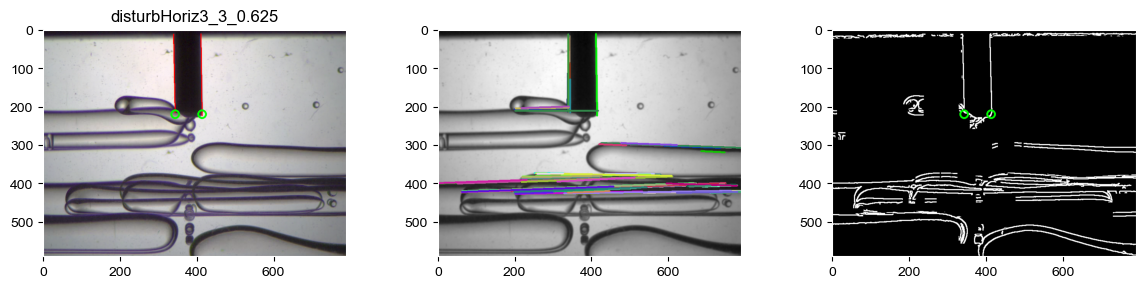

In [287]:
sw.detectNozzle(overwrite=True, diag=2, bgmode=0, modes=[4], frameGetMode=0)

In [137]:
sw.adjustNozzle()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS12.5_S_3.00\I_PDMSS12.5_S_3.00_230808\disturbHoriz3_3_0.625\disturbHoriz3_3_0.625_background_I_PDMSS12.5_S_3.00_230808_152331_0.png


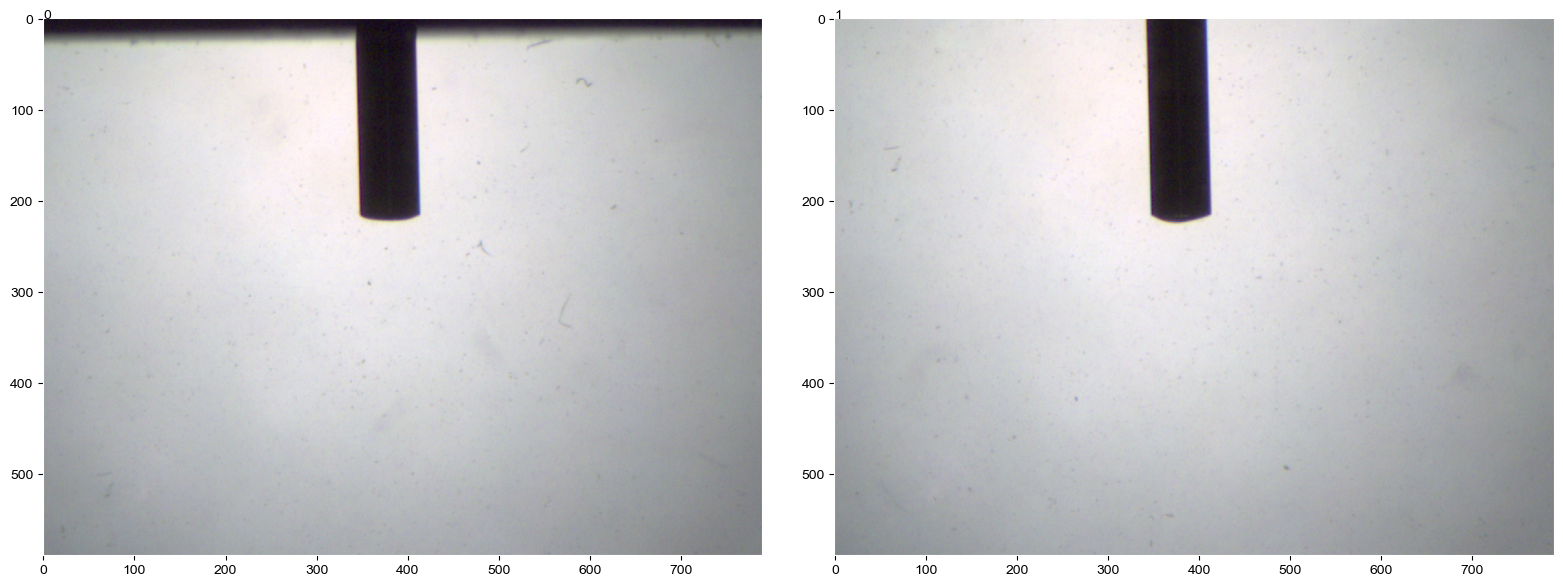

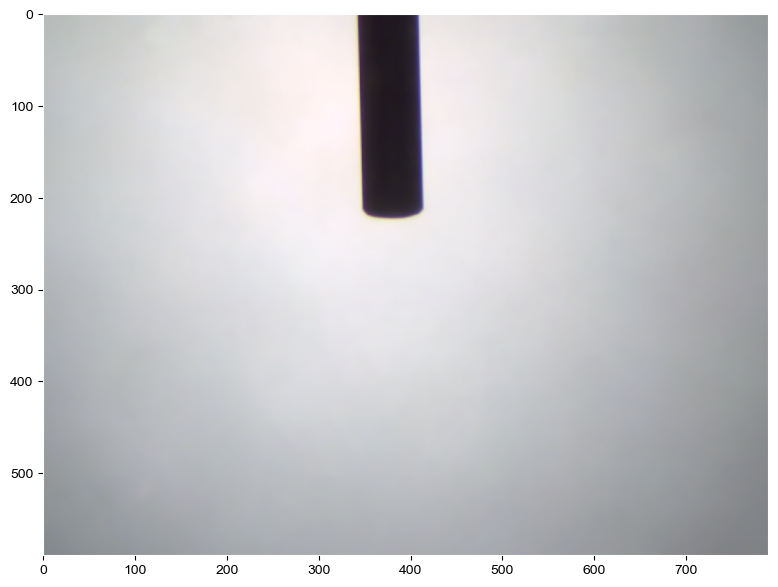

In [292]:
sw.exportBackground(overwrite=True, diag=2, ymin=10, curveFit=False, numpics=4, mode=2)

In [281]:
sw.analyze(overwriteMeasure=True, overwriteSummary=True, useML=False)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS12.5_S_3.00\I_PDMSS12.5_S_3.00_230808\disturbHoriz3_3_0.500\disturbHoriz3_3_0.500_failures_I_PDMSS12.5_S_3.00_230808_152937_6.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS12.5_S_3.00\I_PDMSS12.5_S_3.00_230808\disturbHoriz3_3_0.500\disturbHoriz3_3_0.500_measure_I_PDMSS12.5_S_3.00_230808_152937_6.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS12.5_S_3.00\I_PDMSS12.5_S_3.00_230808\disturbHoriz3_3_0.500\disturbHoriz3_3_0.500_summary_I_PDMSS12.5_S_3.00_230808_152937_6.csv


In [288]:
sw.showFailures()

,file,error
0,successes,NaN
1,l0w1p3,no vals detected
2,l0w2p1,no vals detected
3,l1w1p4,no vals detected
4,l1w2p1,no vals detected
5,l1w2p3,no vals detected
6,l1w2p5,no vals detected
7,l2w1p3,no vals detected
8,l2w1p4,no vals detected
9,l2w2p1,no vals detected


,line,usedML


disturbHoriz3_3_0.625_vstill_HOh3_l3w2p1_I_PDMSS12.5_S_3.00_230808_152331_0.png
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS12.5_S_3.00\I_PDMSS12.5_S_3.00_230808\disturbHoriz3_3_0.625\disturbHoriz3_3_0.625_cropLocs_I_PDMSS12.5_S_3.00_230808_152331_0.csv
INFO: Exported disturbHoriz3_3_0.625_Usegment_HOh3_l3w2p1_I_PDMSS12.5_S_3.00_230808_152331_0.png


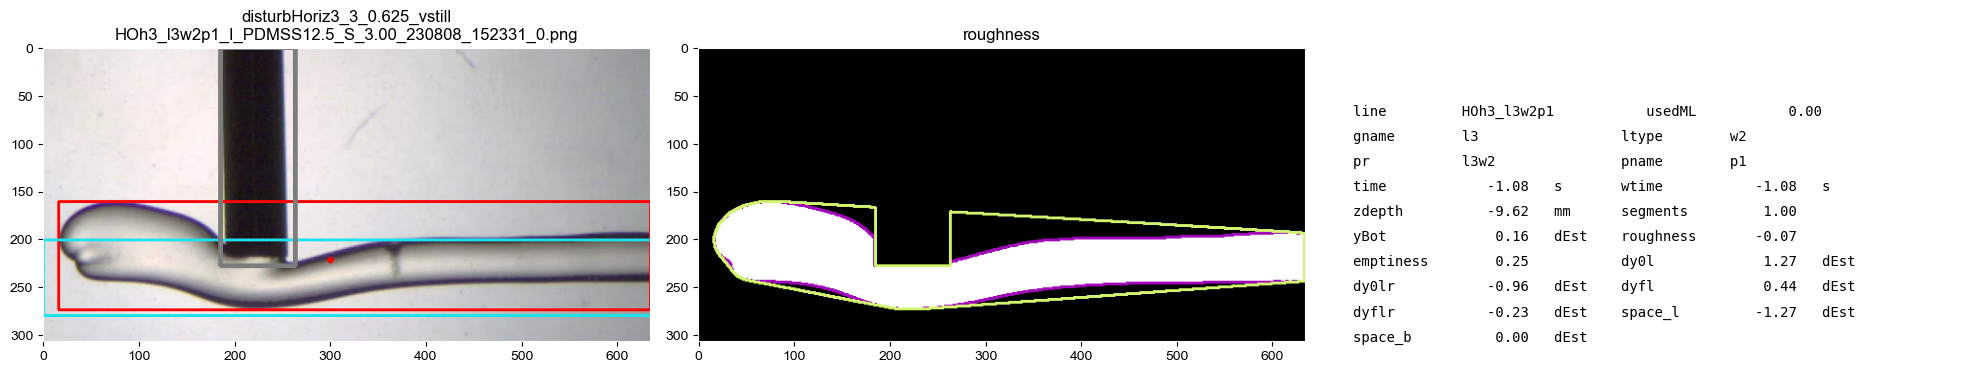

In [302]:
newcl = True
sw.testFailure(10, diag=1,  overrideSegment=True, useML=False, overwriteCropLocs=newcl, exportCropLocs=newcl)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS12.5_S_3.00\I_PDMSS12.5_S_3.00_230808\disturbHoriz3_3_0.625\disturbHoriz3_3_0.625_cropLocs_I_PDMSS12.5_S_3.00_230808_152331_0.csv
INFO: Exported disturbHoriz3_3_0.625_Usegment_HOh3_l2w3o1_I_PDMSS12.5_S_3.00_230808_152331_0.png


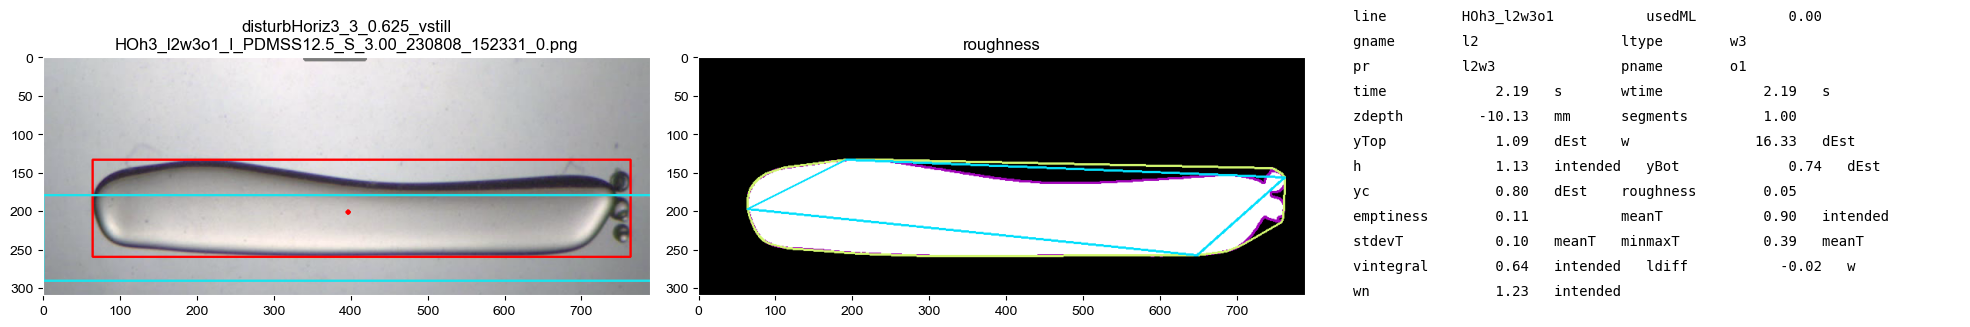

In [303]:
newcl = True
sw.testImage('l2w3o1', diag=1,  overrideSegment=True, useML=False, overwriteCropLocs=newcl, exportCropLocs=newcl)

In [266]:
sw.openLastImage()

In [304]:
sw.openLastSeries()